In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [3]:
df = pd.read_csv('San_Juan_Dengue_Data.csv')
df

,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,additional_cases,total_cases
0,1990/1991,1,1990-04-30,0,0,0,0,4,0,4
1,1990/1991,2,1990-05-07,0,0,0,0,5,0,5
2,1990/1991,3,1990-05-14,0,0,0,0,4,0,4
3,1990/1991,4,1990-05-21,0,0,0,0,3,0,3
4,1990/1991,5,1990-05-28,0,0,0,0,6,0,6
...,...,...,...,...,...,...,...,...,...,...
983,2008/2009,48,2009-03-26,11,0,0,0,13,0,24
984,2008/2009,49,2009-04-02,4,0,0,1,4,0,9
985,2008/2009,50,2009-04-09,13,0,0,1,7,0,21
986,2008/2009,51,2009-04-16,7,0,0,0,3,0,10


In [4]:
df['total_cases'].describe()

count    988.00000
mean      33.42915
std       50.21397
min        0.00000
25%        9.00000
50%       19.00000
75%       37.00000
max      461.00000
Name: total_cases, dtype: float64

In [5]:
df['total_cases'].isnull().sum()

0

In [6]:
# Convert 'Date' to datetime to extract the year
df['week_start_date'] = pd.to_datetime(df['week_start_date'])

# Extract the year from the 'Date' column
df['Year'] = df['week_start_date'].dt.year

# Count the number of entries (weeks) for each year
week_counts = df.groupby('Year').size().reset_index(name='Week_Count')

In [7]:
week_counts

,Year,Week_Count
0,1990,35
1,1991,52
2,1992,52
3,1993,52
4,1994,52
5,1995,52
6,1996,52
7,1997,52
8,1998,52
9,1999,52


In [8]:
week_ranges = []

# Iterate through the dataframe in steps of 52 (since each season_week runs from 1 to 52)
for i in range(0, len(df), 52):
    # Select the 52-week cycle
    cycle_df = df.iloc[i:i + 52]
    
    # Ensure it's exactly 52 weeks long before recording
    if len(cycle_df) == 52:
        # Record the start and end date
        start_date = cycle_df['week_start_date'].min()
        end_date = cycle_df['week_start_date'].max()
        week_ranges.append({'start_date': start_date, 'end_date': end_date})

# Convert the result to a dataframe for easier viewing
result_df = pd.DataFrame(week_ranges)

# Show the result
print(result_df)

   start_date   end_date
0  1990-04-30 1991-04-23
1  1991-04-30 1992-04-22
2  1992-04-29 1993-04-23
3  1993-04-30 1994-04-23
4  1994-04-30 1995-04-23
5  1995-04-30 1996-04-22
6  1996-04-29 1997-04-23
7  1997-04-30 1998-04-23
8  1998-04-30 1999-04-23
9  1999-04-30 2000-04-22
10 2000-04-29 2001-04-23
11 2001-04-30 2002-04-23
12 2002-04-30 2003-04-23
13 2003-04-30 2004-04-22
14 2004-04-29 2005-04-23
15 2005-04-30 2006-04-23
16 2006-04-30 2007-04-23
17 2007-04-30 2008-04-22
18 2008-04-29 2009-04-23


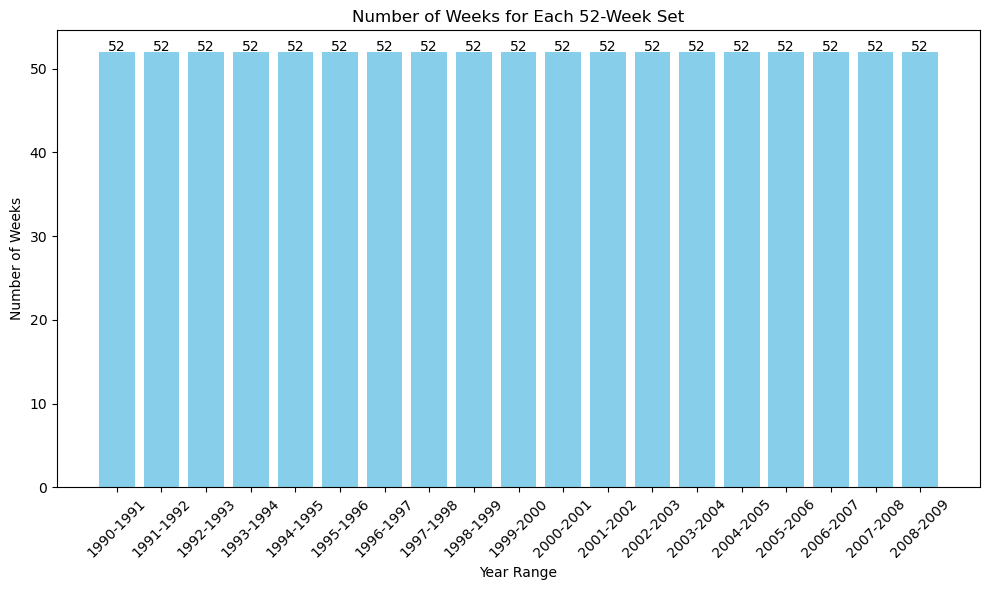

In [9]:
week_ranges = []

# Iterate through the dataframe in steps of 52 (since each season_week runs from 1 to 52)
for i in range(0, len(df), 52):
    # Select the 52-week cycle
    cycle_df = df.iloc[i:i + 52]
    
    # Ensure it's exactly 52 weeks long before recording
    if len(cycle_df) == 52:
        # Record the start and end date
        start_date = cycle_df['week_start_date'].min()
        end_date = cycle_df['week_start_date'].max()
        start_year = start_date.year
        end_year = end_date.year
        
        # Store the result
        week_ranges.append({
            'start_date': start_date, 
            'end_date': end_date, 
            'year_range': f"{start_year}-{end_year}", 
            'week_count': len(cycle_df)
        })

# Convert the result to a dataframe for plotting
result_df = pd.DataFrame(week_ranges)

# Plotting the bar graph
plt.figure(figsize=(10, 6))

# Create the bar plot with the week count on the y-axis and the year ranges on the x-axis
plt.bar(result_df['year_range'], result_df['week_count'], color='skyblue')

# Add labels to each bar (week count) and rotate x-tick labels
for index, row in result_df.iterrows():
    plt.text(index, row['week_count'] + 0.1, str(row['week_count']), ha='center', color='black')

# Add labels and title
plt.xlabel('Year Range')
plt.ylabel('Number of Weeks')
plt.title('Number of Weeks for Each 52-Week Set')

# Adjust the x-axis ticks
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

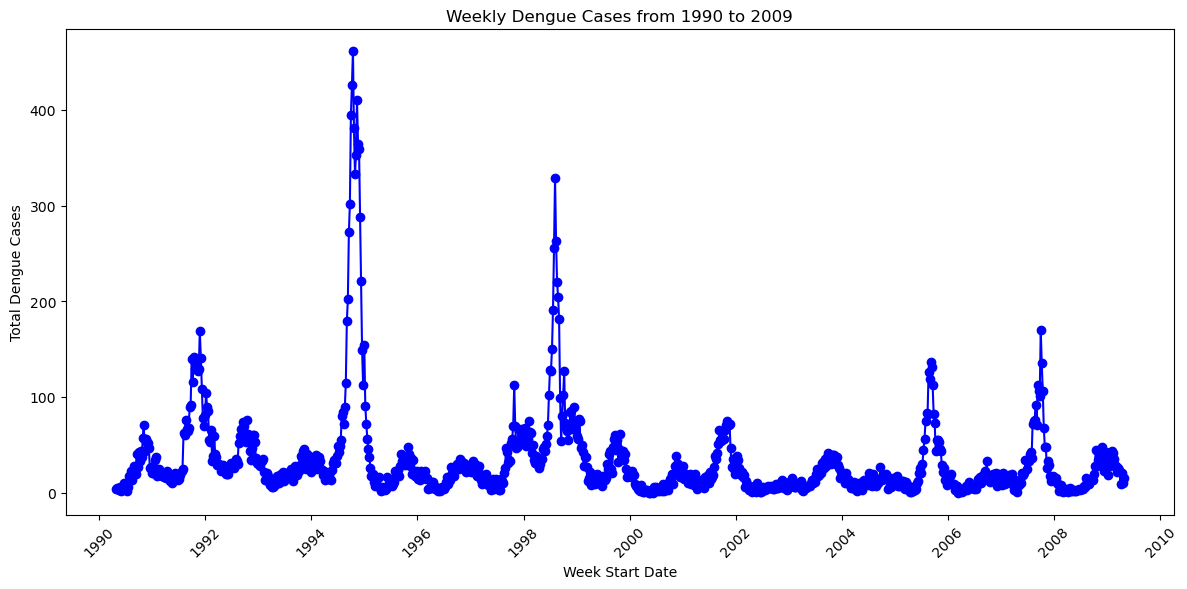

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['week_start_date'], df['total_cases'], marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Week Start Date')
plt.ylabel('Total Dengue Cases')
plt.title('Weekly Dengue Cases from 1990 to 2009')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

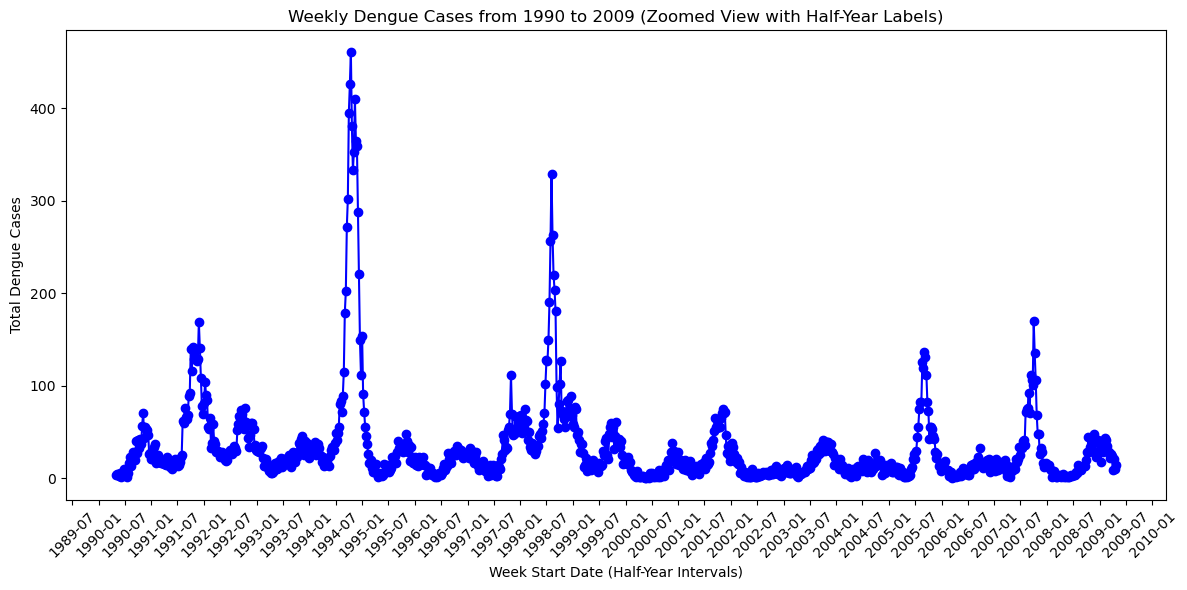

In [12]:
## Line plot

# Convert 'week_start_date' to datetime (if not already)
df['week_start_date'] = pd.to_datetime(df['week_start_date'])

# Plotting the full time series with zoomed x-axis labels
plt.figure(figsize=(12, 6))
plt.plot(df['week_start_date'], df['total_cases'], marker='o', linestyle='-', color='b')

# Set the locator to half-year intervals
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Week Start Date (Half-Year Intervals)')
plt.ylabel('Total Dengue Cases')
plt.title('Weekly Dengue Cases from 1990 to 2009 (Zoomed View with Half-Year Labels)')

# Display the plot
plt.tight_layout()
plt.show()

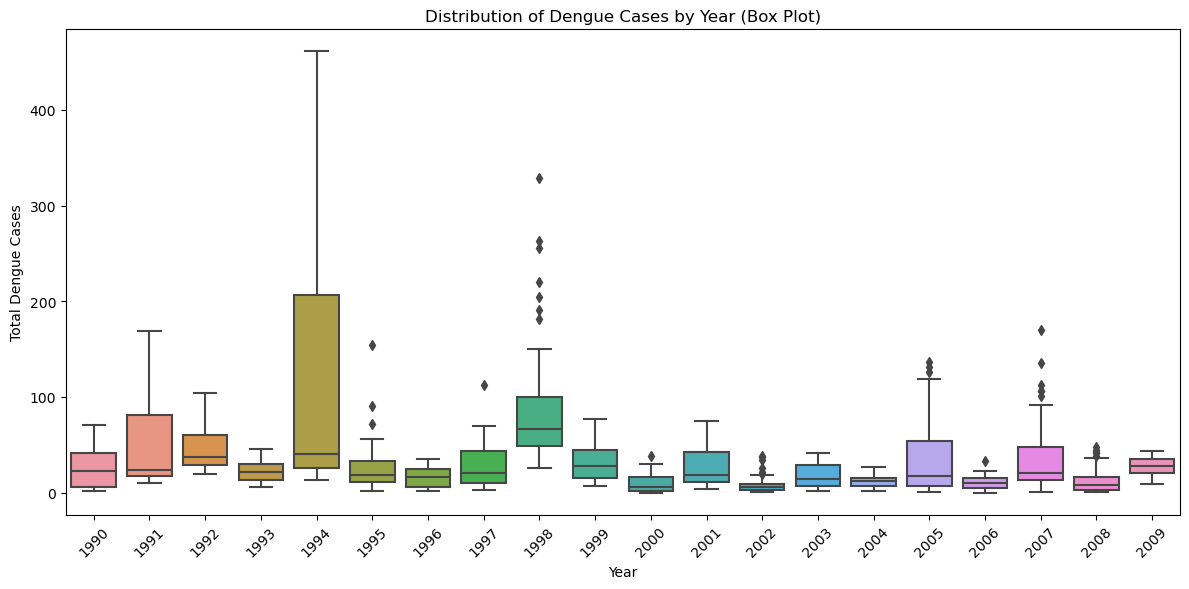

In [13]:
## Box plot

df['Year'] = df['week_start_date'].dt.year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='total_cases', data=df)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.title('Distribution of Dengue Cases by Year (Box Plot)')
plt.tight_layout()
plt.show()

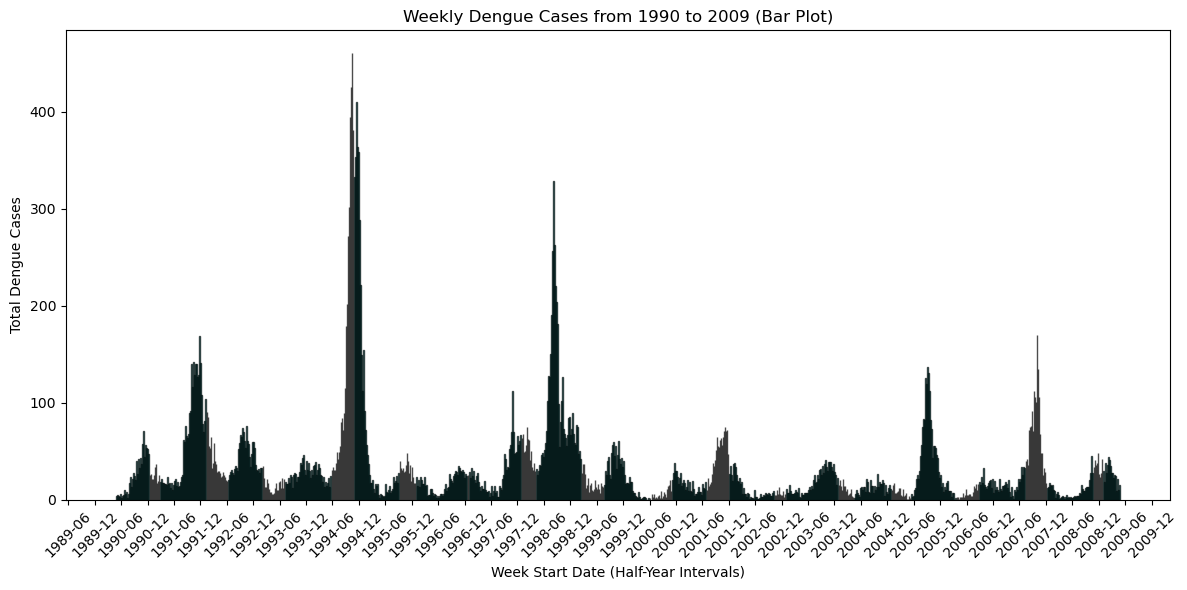

In [14]:
### Bar plot

plt.figure(figsize=(12, 6))
plt.bar(df['week_start_date'], df['total_cases'], width=5, color='c', edgecolor='k', alpha=0.7)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.xlabel('Week Start Date (Half-Year Intervals)')
plt.ylabel('Total Dengue Cases')
plt.title('Weekly Dengue Cases from 1990 to 2009 (Bar Plot)')
plt.tight_layout()
plt.show()


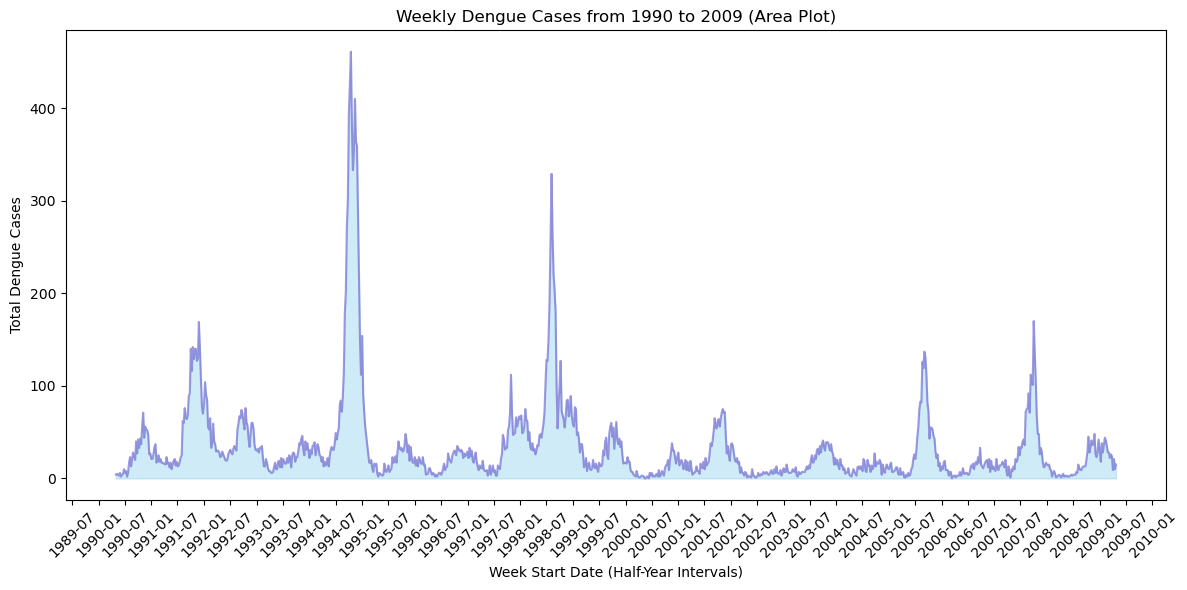

In [15]:
## area plot

plt.figure(figsize=(12, 6))
plt.fill_between(df['week_start_date'], df['total_cases'], color='skyblue', alpha=0.4)
plt.plot(df['week_start_date'], df['total_cases'], color='Slateblue', alpha=0.6)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.xlabel('Week Start Date (Half-Year Intervals)')
plt.ylabel('Total Dengue Cases')
plt.title('Weekly Dengue Cases from 1990 to 2009 (Area Plot)')
plt.tight_layout()
plt.show()

In [16]:
df

,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,additional_cases,total_cases,Year
0,1990/1991,1,1990-04-30,0,0,0,0,4,0,4,1990
1,1990/1991,2,1990-05-07,0,0,0,0,5,0,5,1990
2,1990/1991,3,1990-05-14,0,0,0,0,4,0,4,1990
3,1990/1991,4,1990-05-21,0,0,0,0,3,0,3,1990
4,1990/1991,5,1990-05-28,0,0,0,0,6,0,6,1990
...,...,...,...,...,...,...,...,...,...,...,...
983,2008/2009,48,2009-03-26,11,0,0,0,13,0,24,2009
984,2008/2009,49,2009-04-02,4,0,0,1,4,0,9,2009
985,2008/2009,50,2009-04-09,13,0,0,1,7,0,21,2009
986,2008/2009,51,2009-04-16,7,0,0,0,3,0,10,2009


In [19]:
final_df = df.drop(columns=['season', 'season_week','denv1_cases','denv2_cases','denv3_cases','denv4_cases','other_positive_cases','additional_cases','Year'],axis=1)

In [20]:
final_df

,week_start_date,total_cases
0,1990-04-30,4
1,1990-05-07,5
2,1990-05-14,4
3,1990-05-21,3
4,1990-05-28,6
...,...,...
983,2009-03-26,24
984,2009-04-02,9
985,2009-04-09,21
986,2009-04-16,10


In [21]:
final_df.to_csv('San_Juan_Dengue_Data_Cleaned.csv', index=False)